In [1]:
import pandas as pd

# Load your cleaned and preprocessed delivery data
df = pd.read_csv("../data/serviceable_deliveries.csv")
print(df.head())
print(df.columns)  # Verify the columns (lat, lng, pinCode, distance_from_hub_km, etc.)


   ID  hubId                                            address  pinCode  \
0   1      3  VENKATARANANA MOTORS, KONDAPUR VILLAGE, HYDERA...   500084   
1   2      3  CTRLS Datacenters Ltd, Nanakramguda, Hyderabad...   500032   
2   3      3     T-HUB FOUNDATION, RAIDURGAM, HYDERABAD, 500081   500081   
3   4      3  SANGEETHA MOBILES, MAIN ROAD, PILAPNO C-122, M...   500081   
4   5      3               SANGEETHA Mobiles, HYDERABAD, 500081   500001   

                                  coordinates          fid        lat  \
0         {"lat":17.4426289,"lng":78.3630084}  58897186913  17.442629   
1         {"lat":17.4233287,"lng":78.3303868}  58912701702  17.423329   
2           {"lat":17.434079,"lng":78.378788}  58150388192  17.434079   
3         {"lat":17.3737353,"lng":78.5371694}  58150367671  17.373735   
4  {"lat":17.3683903,"lng":78.57637150000001}  58150367671  17.368390   

         lng  distance_from_hub_km  
0  78.363008             23.617995  
1  78.330387             22.70

In [2]:
distance_threshold_km = 35
nearby = df[df['distance_from_hub_km'] <= distance_threshold_km]
print(f"Number of deliveries within {distance_threshold_km} km: {len(nearby)}")


Number of deliveries within 35 km: 63


In [3]:
min_lat, max_lat = nearby['lat'].min(), nearby['lat'].max()
min_lng, max_lng = nearby['lng'].min(), nearby['lng'].max()

# Optional: add a buffer so you get all relevant roads
buffer = 0.01
north, south = max_lat + buffer, min_lat - buffer
east, west = max_lng + buffer, min_lng - buffer


In [8]:
data_path = '../data/ApexHub_Deliveries.xlsx'
dc = pd.read_excel(data_path, sheet_name='Distribution Center Location ')
hub_lat, hub_lng = map(float, dc['Hub Coordinates'][0].split(','))
hub_point = (hub_lat, hub_lng)

MultiDiGraph with 293313 nodes and 756339 edges


C:\Users\Javier Alfaro\Dropbox\Master\Upwork\routing\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


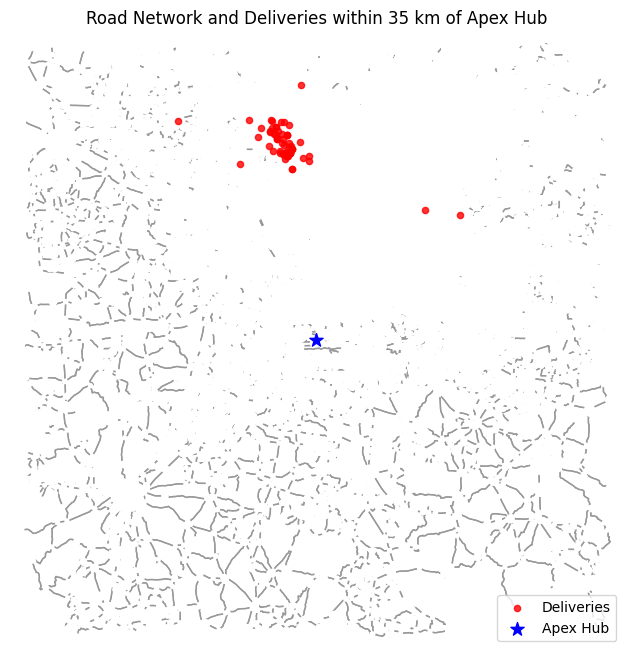

In [20]:
import matplotlib.pyplot as plt

radius_meters = 35_000  # km in meters
radius_km = radius_meters / 1000
G = ox.graph_from_point(hub_point, dist=radius_meters, network_type='drive_service')
print(G)

fig, ax = ox.plot_graph(G, show=False, close=False, bgcolor='w')
# Plot delivery points within your radius
nearby = df[df['distance_from_hub_km'] <= (radius_km)]
ax.scatter(nearby['lng'], nearby['lat'], c='red', s=20, alpha=0.8, label='Deliveries')
ax.scatter(hub_lng, hub_lat, c='blue', s=100, marker='*', label='Apex Hub')
ax.legend()
plt.title(f"Road Network and Deliveries within {radius_km:.0f} km of Apex Hub")
plt.show()


# India Roads (OpenStreetMap)


[Source](https://data.humdata.org/dataset/hotosm_ind_roads)

In [3]:
import geopandas as gpd

gdf = gpd.read_file("../data/deliveries_utm44.gpkg", layer='deliveries_utm44')
print(gdf.crs)

EPSG:32644


In [4]:
import pandas as pd

# Load hub location
data_path = '../data/ApexHub_Deliveries.xlsx'
df_dc = pd.read_excel(data_path, sheet_name='Distribution Center Location')

# Parse hub coordinates
hub_lat, hub_lon = map(float, df_dc.loc[0, 'Hub Coordinates'].split(','))
print(f"Hub coordinates: {hub_lat}, {hub_lon}")

hub_gdf = gpd.GeoDataFrame(
    {'geometry': [gpd.points_from_xy([hub_lon], [hub_lat])[0]]},
    crs='EPSG:4326'
).to_crs(epsg=3857)


Hub coordinates: 17.235389854, 78.41602866


In [5]:
# import geopandas as gpd

# # Check CRS and columns for each layer
# gdf_deliveries = gpd.read_file("../data/deliveries_utm44.gpkg", layer="deliveries")
# print("deliveries layer CRS:", gdf_deliveries.crs)
# print("deliveries layer columns:", gdf_deliveries.columns)

# gdf_utm44 = gpd.read_file("../data/deliveries_utm44.gpkg", layer="deliveries_utm44")
# print("deliveries_utm44 layer CRS:", gdf_utm44.crs)
# print("deliveries_utm44 layer columns:", gdf_utm44.columns)


In [6]:
gdf

address   latitude  longitude  \
0    Avanse Financial Services Ltd, The Grand Build...  17.423019  78.462362   
1    CANON INDIA PVT LTD, SPH Building, The BELVEDE...  17.423458  78.459145   
2    CANON INDIA PVT LTD, SPH - SPH Building, The B...  17.423458  78.459145   
3    SONOVISION ELECTRONICS PRIVATE LIMITED, PUNJAG...  17.425810  78.451861   
4    SS MEDICAL IMAGE PRODUCTS, Medinova Complex, S...  17.418657  78.457758   
..                                                 ...        ...        ...   
633  India Medtronic Pvt Ltd, Banjara Hills, HYDERA...  17.414511  78.430752   
634  India Medtronic Pvt Ltd, Banjara Hills, HYDERA...  17.414511  78.430752   
635  Ethos Limited, ROXANA FORTUNE, Road No- 12, Ba...  17.410770  78.437577   
636  Dr Remedies Healthcare India Pvt Ltd, Amla Col...  17.411755  78.424269   
637  ASK LAB Supplies, DART APEX, Saket Col Phase 1...  17.496043  78.577433   

     distance_from_hub_km                        geometry  
0               21.341579  POINT (230426.073 1928140.848)  
1               21.312631  POINT (230084.769 1928193.917)  
2               21.312631  POINT (230084.769 1928193.917)  
3               21.415761  POINT (229314.017 1928464.655)  
4               20.762082  POINT (229930.303 1927664.345)  
..                    ...                             ...  
633             19.885582  POINT (227053.621 1927243.704)  
634             19.885582  POINT (227053.621 1927243.704)  
635             19.544495  POINT (227773.544 1926819.701)  
636             19.538457   POINT (226360.37 1926947.755)  
637             33.562132  POINT (242758.892 1936066.846)  

[638 rows x 5 columns]

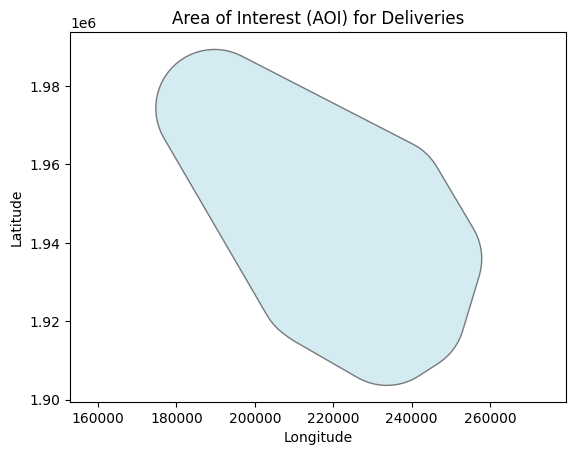

In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint

# Use your deliveries_utm44 layer for correct projected units
gdf = gpd.read_file("../data/deliveries_utm44.gpkg", layer="deliveries_utm44")

# Make sure coordinates are in WGS84 for hull/buffer in degrees (then project to meters for accuracy)
gdf_wgs = gdf.to_crs(epsg=4326)

# Gather points (include hub if needed)
points = [tuple(xy) for xy in zip(gdf_wgs['longitude'], gdf_wgs['latitude'])]
# Optionally append hub: points.append((hub_lon, hub_lat))

# Convex hull + buffer (in degrees: ~0.2° ≈ 20km, but for accuracy buffer in meters in projected CRS!)
mp = MultiPoint(points)
aoi_hull = mp.convex_hull

# Project for accurate buffering in meters
gdf_utm = gdf_wgs.to_crs(epsg=32644)
points_utm = [pt for pt in gdf_utm.geometry]
mp_utm = MultiPoint(points_utm)
aoi = mp_utm.convex_hull.buffer(15_000)  # 20km buffer in meters

# Create a GeoDataFrame for AOI
gdf_aoi = gpd.GeoDataFrame({'geometry': [aoi]}, crs="EPSG:32644")
gdf_aoi.plot(color='lightblue', edgecolor='black', alpha=0.5)
plt.title("Area of Interest (AOI) for Deliveries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axis('equal')
plt.grid(False)
plt.show()

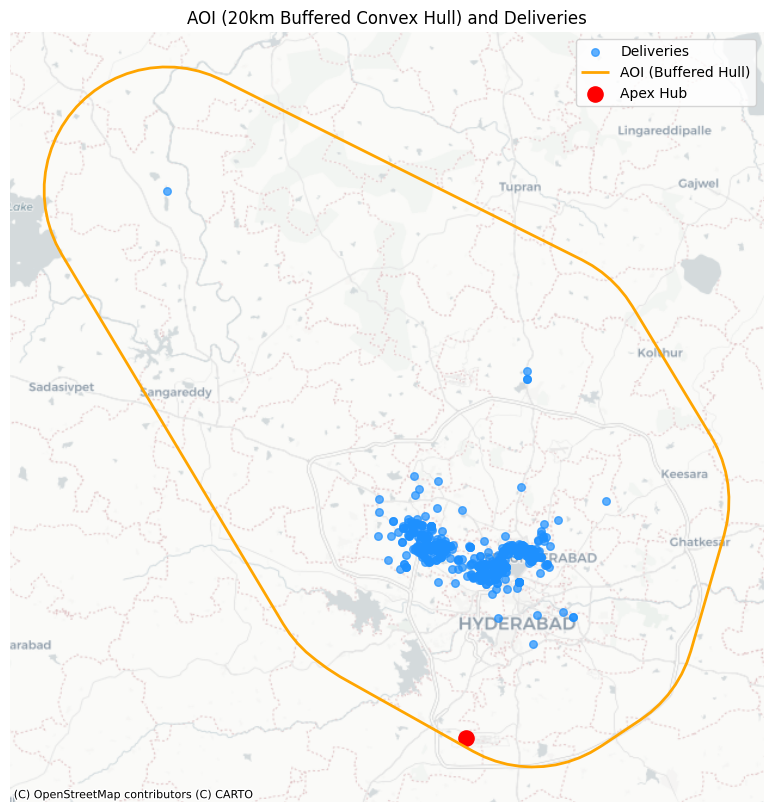

In [56]:
import matplotlib.pyplot as plt
import contextily as ctx

# Project everything to Web Mercator for mapping with contextily
gdf_web = gdf_utm.to_crs(epsg=3857)
gdf_aoi_web = gdf_aoi.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Deliveries
gdf_web.plot(ax=ax, alpha=0.7, color='dodgerblue', markersize=30, label='Deliveries')

# AOI boundary
gdf_aoi_web.boundary.plot(ax=ax, color='orange', linewidth=2, label='AOI (Buffered Hull)')

# Optionally plot the hub if you want
hub_gdf.plot(ax=ax, color='red', markersize=120, label='Apex Hub')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.legend()
plt.title("AOI (20km Buffered Convex Hull) and Deliveries")
plt.show()


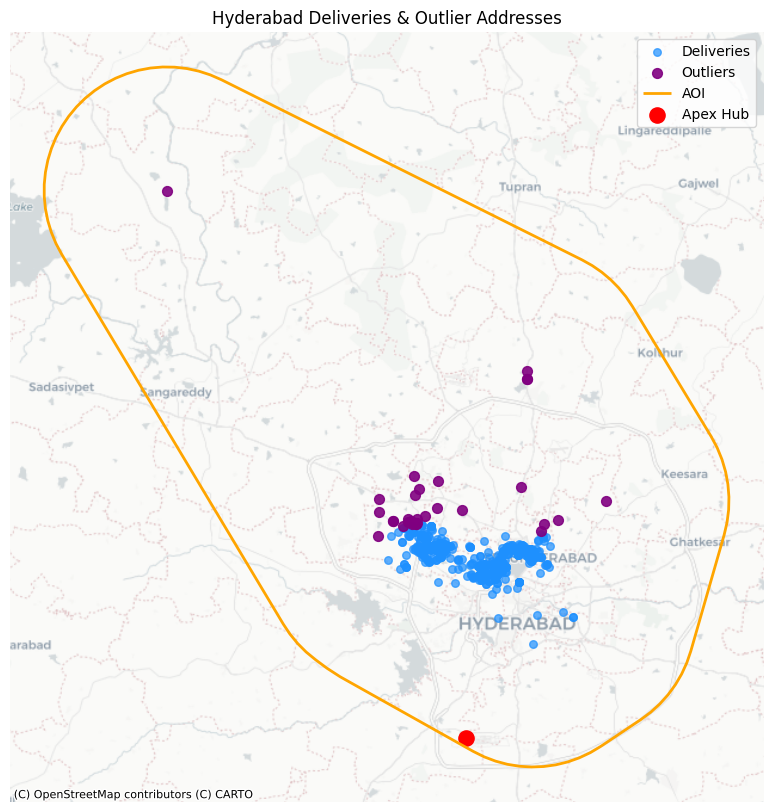

In [57]:
import numpy as np

distances = gdf['distance_from_hub_km']
threshold = np.percentile(distances, 95)  # Top 5% are considered outliers
gdf['outlier'] = distances > threshold

# Plot with color for outliers
fig, ax = plt.subplots(figsize=(10, 10))
gdf_web[~gdf['outlier']].plot(ax=ax, color='dodgerblue', alpha=0.7, markersize=30, label='Deliveries')
gdf_web[gdf['outlier']].plot(ax=ax, color='purple', alpha=0.9, markersize=50, label='Outliers')
gdf_aoi_web.boundary.plot(ax=ax, color='orange', linewidth=2, label='AOI')
hub_gdf.plot(ax=ax, color='red', markersize=120, label='Apex Hub')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.legend()
plt.title("Hyderabad Deliveries & Outlier Addresses")
plt.show()


# Admin Boundary

In [10]:
!uv add pyarrow

Resolved 127 packages in 2ms
Audited 123 packages in 0.32ms


In [11]:
import geopandas as gpd


admin = gpd.read_file("../data/gadm41_IND.gpkg", engine='pyogrio', use_arrow=True)


c:\Users\Javier Alfaro\Dropbox\Master\Upwork\routing\.venv\Lib\site-packages\pyogrio\raw.py:289: UserWarning: More than one layer found in 'gadm41_IND.gpkg': 'ADM_ADM_0' (default), 'ADM_ADM_1', 'ADM_ADM_2', 'ADM_ADM_3'. Specify layer parameter to avoid this warning.
  with open_arrow(


Index(['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry'],
      dtype='object')
                 NAME_1                    NAME_2
0   Andaman and Nicobar           Nicobar Islands
1   Andaman and Nicobar  North and Middle Andaman
2   Andaman and Nicobar             South Andaman
3        Andhra Pradesh                 Anantapur
4        Andhra Pradesh                  Chittoor
5        Andhra Pradesh             East Godavari
6        Andhra Pradesh                    Guntur
7        Andhra Pradesh                   Krishna
8        Andhra Pradesh                   Kurnool
9        Andhra Pradesh                   Nellore
10       Andhra Pradesh                  Prakasam
11       Andhra Pradesh                Srikakulam
12       Andhra Pradesh             Visakhapatnam
13       Andhra Pradesh              Vizianagaram
14       Andhra Pradesh             West Godavari
15    

<Axes: >

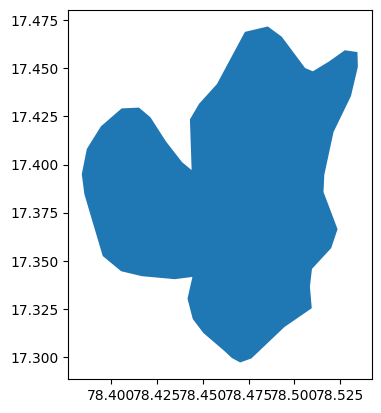

In [14]:
# Load districts (level 2)
districts = gpd.read_file("../data/gadm41_IND.gpkg", layer="ADM_ADM_2", engine="pyogrio", use_arrow=True)
print(districts.columns)
print(districts[['NAME_1', 'NAME_2']].head(20))

# Filter for Telangana / Hyderabad
hyd_district = districts[(districts['NAME_1'].str.contains('Telangana', case=False, na=False)) &
                         (districts['NAME_2'].str.contains('Hyderabad', case=False, na=False))]
print(hyd_district)
hyd_district.plot()


                                            geometry  bbox_west  bbox_south  \
0  MULTIPOLYGON (((78.23871 17.54097, 78.23926 17...  78.238707   17.291638   

   bbox_east  bbox_north   place_id  osm_type   osm_id        lat        lon  \
0  78.622391   17.560832  230905559  relation  7868535  17.360589  78.474061   

      class            type  place_rank  importance addresstype       name  \
0  boundary  administrative          16    0.637894        city  Hyderabad   

                                        display_name  
0  Hyderabad, Bahadurpura mandal, Hyderabad, Tela...  


<Axes: >

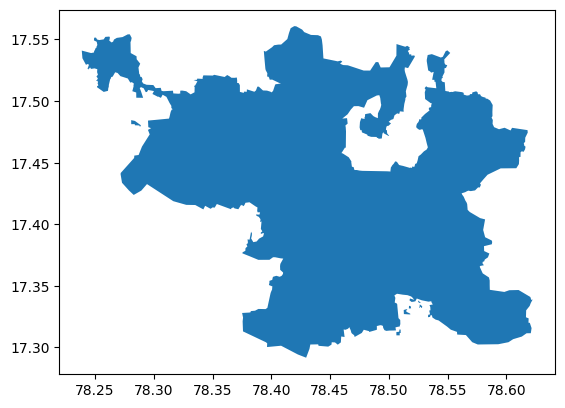

In [13]:
import osmnx as ox

# Get the boundary of Hyderabad, India as a GeoDataFrame
gdf_hyd = ox.geocode_to_gdf("Hyderabad, Telangana, India")
print(gdf_hyd)
gdf_hyd.plot()


In [25]:
if hyd_district.crs != 'EPSG:4326':
    hyd_district = hyd_district.to_crs('EPSG:4326')
if gdf_hyd.crs != 'EPSG:4326':
    gdf_hyd = gdf_hyd.to_crs('EPSG:4326')
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs('EPSG:4326')


hyd_district_web = hyd_district.to_crs(epsg=3857)
gdf_hyd_web = gdf_hyd.to_crs(epsg=3857)
gdf_web = gdf.to_crs(epsg=3857)


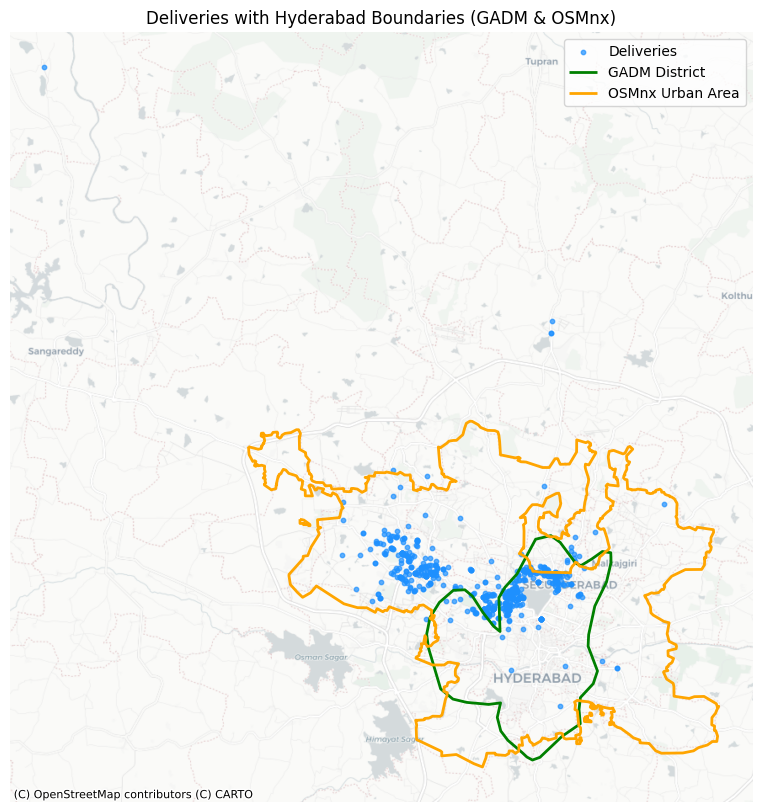

In [26]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(10, 10))

# Plot deliveries as points
gdf_web.plot(ax=ax, color='dodgerblue', markersize=10, alpha=0.7, label='Deliveries')

# Plot GADM Hyderabad district boundary
hyd_district_web.boundary.plot(ax=ax, color='green', linewidth=2, label='GADM District')

# Plot OSMnx Hyderabad urban boundary
gdf_hyd_web.boundary.plot(ax=ax, color='orange', linewidth=2, label='OSMnx Urban Area')

# Add a basemap for context
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Styling
ax.set_axis_off()
plt.legend()
plt.title("Deliveries with Hyderabad Boundaries (GADM & OSMnx)")
plt.show()


In [ ]:
from shapely.geometry import MultiPolygon

# Sometimes gdf_hyd.geometry is a GeoSeries; take the union of all geometries
city_polygon = gdf_hyd.union_all()

# Only deliveries within the OSMnx Hyderabad city polygon
deliveries_in_city = gdf[gdf.within(city_polygon)]
print(f"{len(deliveries_in_city)} deliveries within OSMnx urban area")

deliveries_in_city = gpd.sjoin(
    gdf, 
    gdf_hyd[['geometry']], 
    how="inner", 
    predicate="within"
)

outside_city = gdf[~gdf.within(city_polygon)]
print(f"{len(outside_city)} deliveries outside OSMnx urban area")

605 deliveries within OSMnx urban area
33 deliveries outside OSMnx urban area


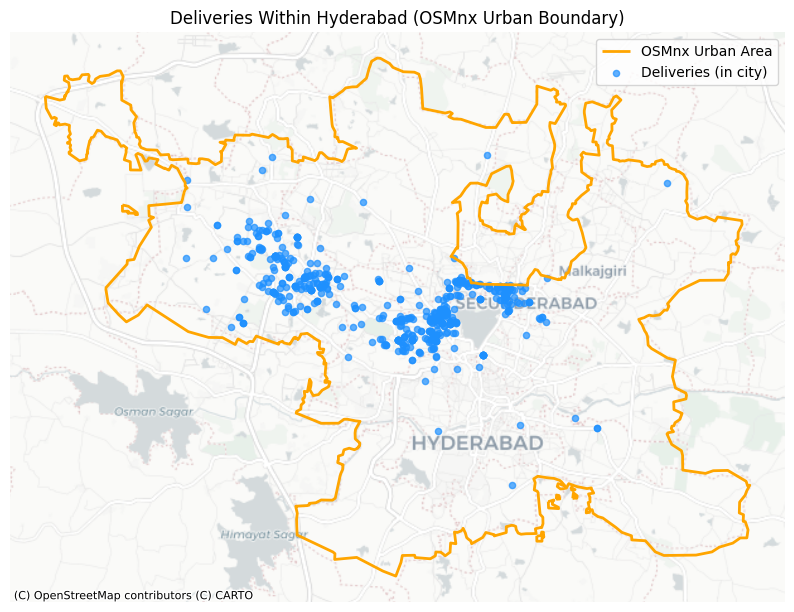

In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx

# Project both to Web Mercator for contextily
gdf_hyd_web = gdf_hyd.to_crs(epsg=3857)
gdf_in_city_web = deliveries_in_city.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Hyderabad city boundary (OSMnx)
gdf_hyd_web.boundary.plot(ax=ax, color="orange", linewidth=2, label="OSMnx Urban Area")

# Plot delivery points within the city
gdf_in_city_web.plot(ax=ax, color="dodgerblue", markersize=20, alpha=0.7, label="Deliveries (in city)")

# Optional: Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()
plt.legend()
plt.title("Deliveries Within Hyderabad (OSMnx Urban Boundary)")
plt.show()


# Roads Dataset

In [52]:
import geopandas as gpd

roads_path = "../data/hotosm_ind_roads_lines.gpkg"  # Update to your actual file

# Only load features that intersect the Hyderabad city boundary (very efficient)
roads_in_city = gpd.read_file(
    roads_path,
    mask=city_polygon,       # This is the clip!
    engine="pyogrio",
    use_arrow=True
)
print(f"Loaded {len(roads_in_city)} roads in Hyderabad")

roads_web = roads_in_city.to_crs(epsg=3857)
city_boundary_web = gdf_hyd.to_crs(epsg=3857)

Loaded 99397 roads in Hyderabad


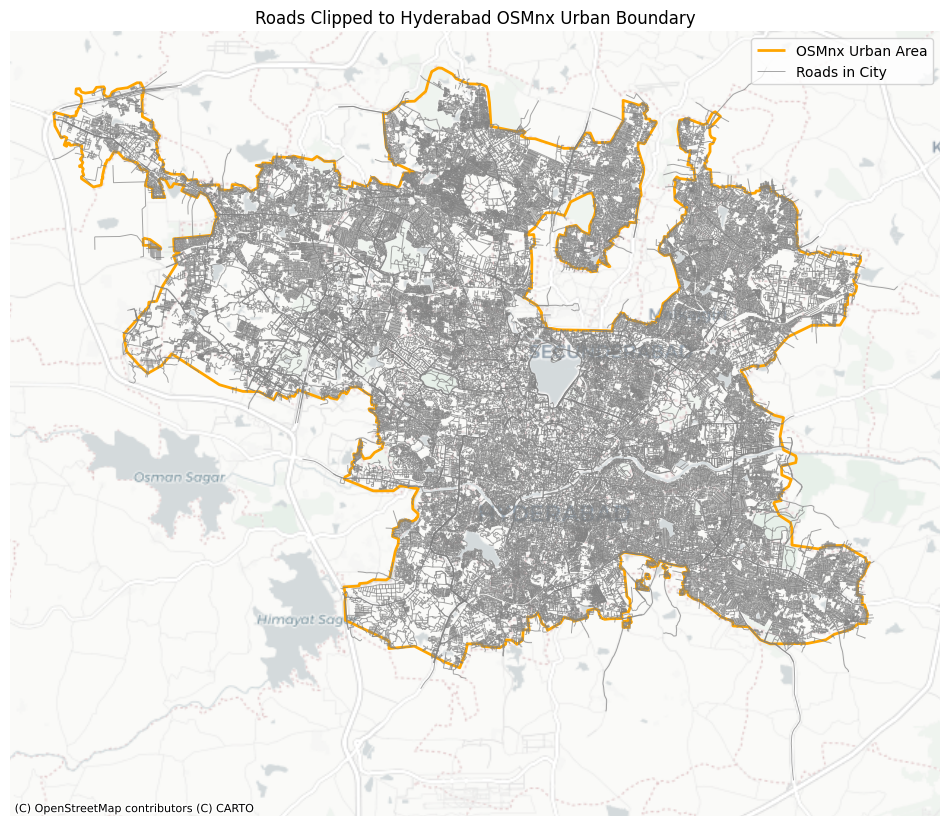

In [47]:


import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(12,12))
city_boundary_web.boundary.plot(ax=ax, color='orange', linewidth=2, label="OSMnx Urban Area")
roads_web.plot(ax=ax, linewidth=0.7, color='gray', alpha=0.7, label='Roads in City')
plt.legend()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title("Roads Clipped to Hyderabad OSMnx Urban Boundary")
plt.show()


# Roads + Points

In [ ]:
# Project roads and boundary (should already be in EPSG:3857 from before)
roads_web = roads_in_city.to_crs(epsg=3857)
city_boundary_web = gdf_hyd.to_crs(epsg=3857)

# Project your filtered deliveries (or use all if you wish)
deliveries_web = deliveries_in_city.to_crs(epsg=3857)


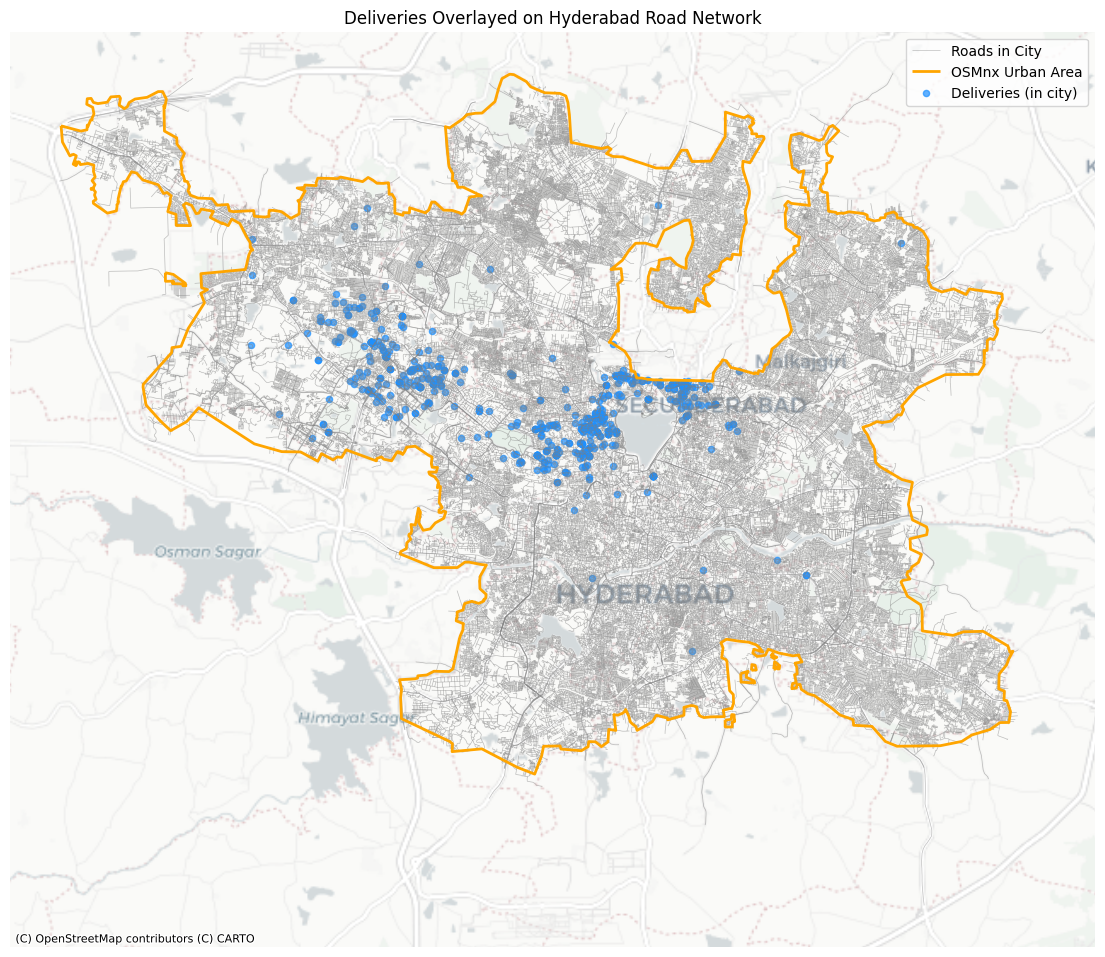

In [51]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(14, 12))

# Plot roads (bottom layer)
roads_web.plot(ax=ax, linewidth=0.5, color='gray', alpha=0.5, label="Roads in City")

# Plot the city boundary
city_boundary_web.boundary.plot(ax=ax, color='orange', linewidth=2, label="OSMnx Urban Area")

# Plot deliveries
gdf_in_city_web.plot(ax=ax, color="dodgerblue", markersize=20, alpha=0.7, label="Deliveries (in city)")

# Basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()
plt.legend()
plt.title("Deliveries Overlayed on Hyderabad Road Network")
plt.show()
